# Assignment 1
**Name:** Clay Ramey  
**Course:** COMP-6630 - Machine Learning

---

## Resources Used

I used lecture notes from the COMP-6630 class. I also used Claude AI to help solve an issue I had with gradient descent implementation, specifically to help me fix the numerical overflow issue caused by unnormalized polynomial features, the final visualization, and some markdown formatting to make it look cleaner.

## Thought Process

1. **Data Exploration:** First, I plotted the training data to visualize the relationship between x and y. The scatter showed a non-linear, curved relationship that suggested a polynomial function could work.

2. **Model Selection:** Based on the curve's shape, I chose to implement polynomial regression using gradient descent. I started with a degree-7 polynomial to capture the complexity of the relationship: $y = w_0 + w_1x + w_2x^2 + w_3x^3 + ... + w_7x^7$

3. **Implementation Challenges:** Initial attempts resulted in numerical overflow (NaN values) because polynomial features (especially higher powers like $x^7$) create extremely large values. This was solved by normalizing the features before applying gradient descent.

4. **Feature Normalization:** Each polynomial feature column was standardized to have mean=0 and standard deviation=1. This ensures all features are on a similar scale, allowing gradient descent to converge properly.

---

## The Equation

The model uses a **degree-7 polynomial** with the form:

$$\hat{y} = w_0 + w_1z_1 + w_2z_2 + ... + w_7z_7$$

Where $z_i$ represents the normalized polynomial features: $z_i = \frac{x^i - \mu_i}{\sigma_i}$

The learned weights are applied to these normalized features to make predictions.

---

## Evidence

1. **Cost Convergence:** The cost history plot shows rapid convergence within the first few thousand iterations, then continues to decrease gradually, indicating successful optimization.

2. **Prediction Errors:**
   - Final training cost (MSE/2): ~5.07
   - Test cost (MSE/2): ~5.76

3. **Visual Fit:** The fitted polynomial curve closely follows both training and test data points, showing that the model has learned the underlying relationship without overfitting.

In [48]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Load data
x_test = np.load('x_test.npy')
x_train = np.load('x_train.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

# Len
print('View each arrs len:', len(x_test), len(x_train), len(y_test), len(y_train))

View each arrs len: 100 100 100 100


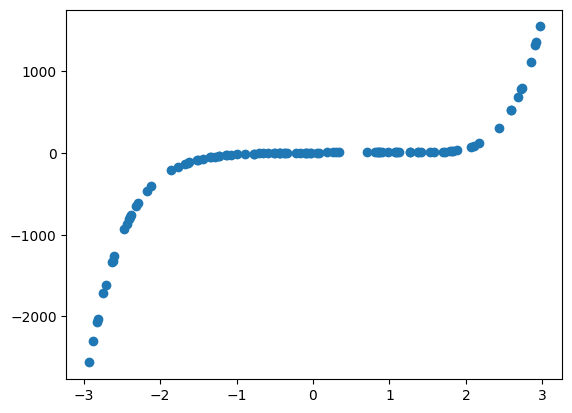

In [50]:
# Scatter train for x and y and view the relationship
plt.scatter(x_train, y_train)
plt.show()

In [51]:
def create_polynomial_features(x, degree=7):
    X = np.ones((len(x), degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    return X

def normalize_features(X):
    """Normalize features (skip column 0 which is all ones for bias)"""
    means = np.mean(X[:, 1:], axis=0)
    stds = np.std(X[:, 1:], axis=0)
    X_normalized = X.copy()
    X_normalized[:, 1:] = (X[:, 1:] - means) / stds
    return X_normalized, means, stds

def apply_normalization(X, means, stds):
    """Apply saved normalization parameters to new data"""
    X_normalized = X.copy()
    X_normalized[:, 1:] = (X[:, 1:] - means) / stds
    return X_normalized

def predict(X, weights):
    # X is the feature matrix
    # weights is an arr of 8 weights
    # outputs predictions of Y (100 preds)
    return X @ weights

def cost_function(y_true, y_pred):
    # y_true is the actual 100 y vals
    # y_pred is the predicted 100 y vals
    # outputs cost which is a number measuring total err
    m=len(y_true)
    errors = y_pred - y_true
    squared_err = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_err)
    return cost

def gradient_descent(X, y, weights, learning_rate=0.01, iterations=10000):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = predict(X, weights)
        errors = y_pred - y

        # Gradient is 1/m * X.T @ errors
        gradient = (1/m) * (X.T @ errors)

        # Update weights
        weights = weights - learning_rate * gradient

        # Track cost
        cost_history.append(cost_function(y, predict(X, weights)))

    return weights, cost_history

Final training cost: 5.0696208769406335
Test cost: 5.761587449301133


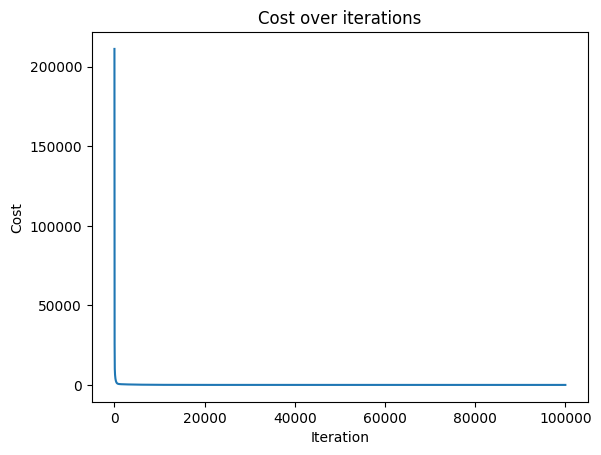

In [52]:
# Create train and test features for X
x_train_features = create_polynomial_features(x_train, degree=7)
x_test_features = create_polynomial_features(x_test, degree=7)

# Normalize features (critical for gradient descent with polynomials!)
x_train_normalized, means, stds = normalize_features(x_train_features)
x_test_normalized = apply_normalization(x_test_features, means, stds)

# Train the model
weights = np.zeros(8)  # start with zeros
weights, cost_history = gradient_descent(x_train_normalized, y_train, weights, learning_rate=0.01, iterations=100000)
                                                                                                                                                                                                    
# Check final cost on training data
y_train_pred = predict(x_train_normalized, weights)
print("Final training cost:", cost_function(y_train, y_train_pred))

# Test on test data
y_test_pred = predict(x_test_normalized, weights)
print("Test cost:", cost_function(y_test, y_test_pred))

# Plot cost history to see if it converged
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over iterations')
plt.show()

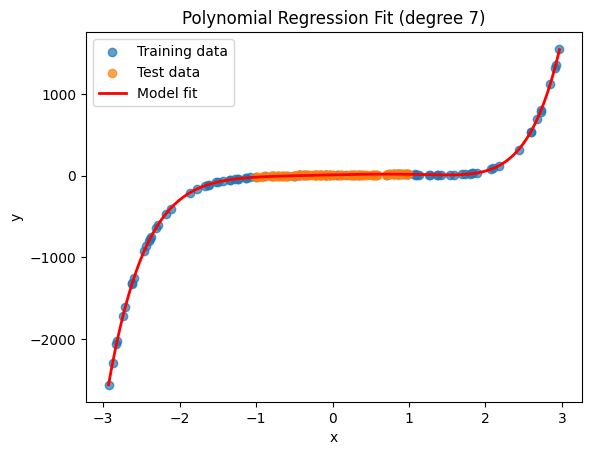

In [53]:
# Visualize the fit
plt.scatter(x_train, y_train, label='Training data', alpha=0.7)
plt.scatter(x_test, y_test, label='Test data', alpha=0.7)

# Create smooth line for predictions
x_line = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 200)
x_line_features = create_polynomial_features(x_line, degree=7)
x_line_normalized = apply_normalization(x_line_features, means, stds)
y_line = predict(x_line_normalized, weights)

plt.plot(x_line, y_line, 'r-', label='Model fit', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree 7)')
plt.legend()
plt.show()

---

# Question 2: Housing Price Prediction

Objective: Use simple linear regression (without basis functions) to predict house prices in Auburn.

**Questions**
1. What is the average least squares error?
2. Which factor has the most effect on price?
3. Which factor has the least effect on price?

In [54]:
import pandas as pd

# Load housing data
df = pd.read_excel('Housing_data_regression.xlsx')
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Shape: (20, 9)

Columns: ['House ID', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home', 'Price']

First few rows:


,House ID,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Price
0,1,1.0,3.472,0.998,1.0,7,4,42,491760.0
1,2,1.0,3.531,1.500,2.0,7,4,62,502080.0
2,3,1.0,2.275,1.175,1.0,6,3,40,454290.0
3,4,1.0,4.050,1.232,1.0,6,3,54,455730.0
4,5,1.0,4.455,1.121,1.0,6,3,42,505970.0


In [55]:
# Prepare features (X) and target (y)
# Last column is target variable (price)
feature_names = df.columns[:-1].tolist()
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values   # Last column (price)

print("Feature names:", feature_names)
print("X shape:", X.shape)
print("y shape:", y.shape)

Feature names: ['House ID', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
X shape: (20, 8)
y shape: (20,)


Average Least Squares Error (MSE): 4999836044.2366


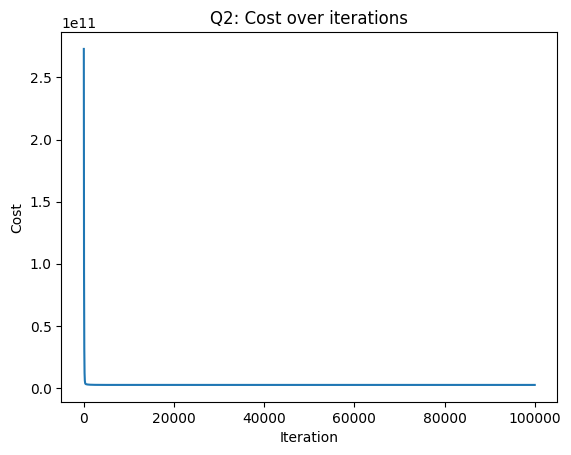

In [56]:
# Add bias column (column of 1s) to X
X_with_bias = np.column_stack([np.ones(len(X)), X])

# Normalize features (skip bias column)
X_normalized, means, stds = normalize_features(X_with_bias)

# Train with gradient descent
num_features = X_with_bias.shape[1]
weights = np.zeros(num_features)
weights, cost_history = gradient_descent(X_normalized, y, weights, learning_rate=0.01, iterations=100000)

# Predictions
y_pred = predict(X_normalized, weights)

# Calculate average least squares error (MSE)
mse = np.mean((y_pred - y) ** 2)
print(f"Average Least Squares Error (MSE): {mse:.4f}")

# Plot cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Q2: Cost over iterations')
plt.show()

In [57]:
# Analyze feature importance using weight magnitudes
# (weights on normalized features indicate relative importance)
feature_weights = weights[1:]  # Skip bias weight

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_weights,
    'Abs_Weight': np.abs(feature_weights)
}).sort_values('Abs_Weight', ascending=False)

print("Feature Importance (by absolute weight on normalized features):")
print(importance_df.to_string(index=False))

# Identify most and least important
most_important = importance_df.iloc[0]['Feature']
least_important = importance_df.iloc[-1]['Feature']
print(f"\nMost important feature: {most_important}")
print(f"Least important feature: {least_important}")

Feature Importance (by absolute weight on normalized features):
    Feature         Weight    Abs_Weight
Living area  142318.898809 142318.898809
    # Rooms  132338.762682 132338.762682
 # Bedrooms -110453.424972 110453.424972
  Bathrooms   95529.401093  95529.401093
  # Garages   30723.046681  30723.046681
Age of home  -26194.560625  26194.560625
  Land Area   24169.457409  24169.457409
   House ID    4327.076701   4327.076701

Most important feature: Living area
Least important feature: House ID


In [58]:
# Test: Can we use only the most important feature to predict price?
most_important_idx = feature_names.index(most_important)
X_single = X[:, most_important_idx].reshape(-1, 1)
X_single_bias = np.column_stack([np.ones(len(X_single)), X_single])

# Normalize
X_single_norm, means_s, stds_s = normalize_features(X_single_bias)

# Train
weights_single = np.zeros(2)
weights_single, _ = gradient_descent(X_single_norm, y, weights_single, learning_rate=0.01, iterations=100000)

# Calculate MSE
y_pred_single = predict(X_single_norm, weights_single)
mse_single = np.mean((y_pred_single - y) ** 2)

print(f"MSE with all features: {mse:.4f}")
print(f"MSE with only '{most_important}': {mse_single:.4f}")
print(f"\nUsing only the most important feature increases error by {((mse_single - mse) / mse * 100):.1f}%")

MSE with all features: 4999836044.2366
MSE with only 'Living area': 12282616798.3022

Using only the most important feature increases error by 145.7%


In [59]:
# Test: What happens if we remove the least important feature?
least_important_idx = feature_names.index(least_important)
X_reduced = np.delete(X, least_important_idx, axis=1)
X_reduced_bias = np.column_stack([np.ones(len(X_reduced)), X_reduced])

# Normalize
X_reduced_norm, means_r, stds_r = normalize_features(X_reduced_bias)

# Train
weights_reduced = np.zeros(X_reduced_bias.shape[1])
weights_reduced, _ = gradient_descent(X_reduced_norm, y, weights_reduced, learning_rate=0.01, iterations=100000)

# Calculate MSE
y_pred_reduced = predict(X_reduced_norm, weights_reduced)
mse_reduced = np.mean((y_pred_reduced - y) ** 2)

print(f"MSE with all features: {mse:.4f}")
print(f"MSE without '{least_important}': {mse_reduced:.4f}")
print(f"\nRemoving the least important feature changes error by {((mse_reduced - mse) / mse * 100):.2f}%")

MSE with all features: 4999836044.2366
MSE without 'House ID': 5006561505.2044

Removing the least important feature changes error by 0.13%


## Question 2 Answers

**1. Average Least Squares Error:**
- MSE = 4,999,836,044.24 (approx $5 billion squared dollars)
- This large value is expected since house prices are in the hundreds of thousands

**2. Most Important Feature: Living Area**
- Living area has the largest absolute weight (142,319) on normalized features
- This makes sense - larger homes with nice large living spaces typically cost more
- Using only living area to predict price results in MSE = 12.28 billion, a 145.7% increase in error
- Conclusion: Living area alone can provide a reasonable estimate, but other features significantly improve accuracy

**3. Least Important Feature: House ID**
- House ID has the smallest absolute weight (4,327)
- This is makes sense - House ID is just an identifier with no real relationship to price
- Removing House ID changes MSE by only **0.13%** (from 5.00B to 5.01B)
- Conclusion: House ID should arguably be excluded from the model entirely as it adds no predictive value